                Comparative Analysis on Diet Plans

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load and preprocess data

In [3]:
df = pd.read_csv('resource/sd.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1381, 19)


food_code       food_name  food_group_nin  energy_kcal     carb_g  \
0         1    Palak Paneer      Vegetarian        175.0  11.666667   
1         2   Chole Bhature      Vegetarian        355.0  53.250000   
2         3  Butter Chicken  Non-Vegetarian        320.0   9.142857   
3         4       Dal Tadka      Vegetarian        233.0  40.775000   
4         5     Masala Dosa      Vegetarian        336.0  48.000000   

   protein_g      fat_g  freesugar_g   fibre_g  cholesterol_mg allergies  \
0  10.500000  12.833333     2.333333  3.500000       29.166667      Milk   
1  11.833333  17.750000     5.916667  7.100000        0.000000    Gluten   
2  22.857143  18.285714     2.742857  1.828571       64.000000      Milk   
3  13.980000   5.825000     1.165000  5.825000        0.000000       NaN   
4   6.720000  11.520000     0.960000  2.880000        0.000000    Gluten   

        region  Serving_Size_g  food_type  protein_calorie_ratio  \
0  North India             100      lunch               0.060000   
1  North India             100      lunch               0.033333   
2  North India             100      lunch               0.071429   
3    Pan-India             100      lunch               0.060000   
4  South India             100  breakfast               0.020000   

   nutrient_score  health_score  diversity_score energy_category  
0        1.166667          26.5                4             Low  
1        1.183333          44.5                7          Medium  
2        0.914286          64.5                2          Medium  
3        1.165000          56.5                5             Low  
4        0.960000          32.5                4          Medium

# Data cleaning

In [4]:
df = df.dropna(subset=['energy_kcal', 'protein_g', 'carb_g', 'fat_g', 'nutrient_score', 'health_score'])
df = df.drop_duplicates(subset=['food_name'])
print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (1001, 19)


# Feature selection and scaling

In [5]:
features = ['energy_kcal', 'protein_g', 'carb_g', 'fat_g', 'fibre_g', 
            'protein_calorie_ratio', 'nutrient_score', 'health_score', 'diversity_score']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

Algorithm 1: Content-Based Filtering

In [6]:
def content_based_recommend(user_profile, items_df, top_n=5):
    """
    Content-based recommendation based on nutritional similarity
    """
    # Calculate similarity between user profile and all food items
    similarities = cosine_similarity(
        [user_profile[features].values],
        items_df[features].values
    )
    
    # Get top N most similar items
    top_indices = np.argsort(similarities[0])[-top_n:][::-1]
    recommendations = items_df.iloc[top_indices]
    
    return recommendations


In [7]:
# Create a sample user profile (vegetarian, health-conscious)
sample_user = {
    'energy_kcal': 0.5,        # Medium calorie preference
    'protein_g': 0.8,          # High protein
    'carb_g': 0.4,             # Medium carbs
    'fat_g': 0.3,              # Low fat
    'fibre_g': 0.7,            # High fiber
    'protein_calorie_ratio': 0.7,
    'nutrient_score': 0.9,     # High nutrient score
    'health_score': 0.9,       # High health score
    'diversity_score': 0.5     # Medium diversity
}
user_profile = pd.Series(sample_user)

# %%
# Get recommendations
content_recs = content_based_recommend(user_profile, df)
content_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score']]

food_name  food_group_nin  energy_kcal  protein_g  \
1160                 Grilled Tempeh      Vegetarian     0.324324       0.40   
1239     Vegetable and Chicken Soup  Non-Vegetarian     0.324324       0.36   
1184           Grilled Tofu Skewers      Vegetarian     0.252252       0.30   
1224        Baked Tofu with Veggies      Vegetarian     0.378378       0.40   
1261  Tofu and Cauliflower Stir Fry      Vegetarian     0.342342       0.36   

      health_score  
1160      0.553030  
1239      0.553030  
1184      0.553030  
1224      0.628788  
1261      0.590909

Algorithm 2: Clustering-Based Recommendation

In [8]:
# Determine optimal number of clusters
sse = []
silhouette = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df[features], kmeans.labels_))

# %%
# Plot elbow curve and silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [9]:
# Fit KMeans with optimal clusters (k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

In [10]:
df[features]

energy_kcal  protein_g    carb_g     fat_g   fibre_g  \
0        0.243243   0.210000  0.167213  0.422914  0.305760   
1        0.567568   0.236667  0.763206  0.584940  0.620257   
2        0.504505   0.457143  0.131040  0.602594  0.159744   
3        0.347748   0.279600  0.584408  0.191959  0.508873   
4        0.533333   0.134400  0.687961  0.379634  0.251597   
...           ...        ...       ...       ...       ...   
1375     0.612613   0.700000  0.429975  0.494315  0.611521   
1377     0.414414   0.360000  0.501638  0.263635  0.611521   
1378     0.558559   0.360000  0.644963  0.461361  0.786241   
1379     0.468468   0.400000  0.501638  0.395452  0.611521   
1380     0.432432   0.300000  0.573301  0.329544  0.611521   

      protein_calorie_ratio  nutrient_score  health_score  diversity_score  
0                  0.285036        0.776031      0.299242            0.375  
1                  0.158353        0.794695      0.435606            0.750  
2                  0.339328        0.493404      0.587121            0.125  
3                  0.285036        0.774165      0.526515            0.500  
4                  0.095012        0.544597      0.344697            0.375  
...                     ...             ...           ...              ...  
1375               0.437530        0.690177      0.704545            0.000  
1377               0.316865        0.667780      0.553030            0.375  
1378               0.244181        0.667780      0.628788            0.250  
1379               0.316865        0.667780      0.590909            0.250  
1380               0.254632        0.667780      0.553030            0.375  

[1001 rows x 9 columns]

In [11]:
import plotly.express as px
from sklearn.decomposition import PCA

# Create 3D PCA components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[features])
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add cluster and food info
df_pca['cluster'] = df['cluster'].astype(str)
df_pca['food_name'] = df['food_name']
df_pca['protein'] = df['protein_g']  # For hover info
df_pca['carbs'] = df['carb_g']       # For hover info

# Create interactive 3D plot
fig = px.scatter_3d(
    df_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',
    hover_name='food_name',
    hover_data=['protein', 'carbs'],
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='<b>3D Food Clusters Visualization</b><br>PCA Components with K-Means Clustering'
)

# Update layout with proper closing
fig.update_layout(
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend_title_text='Cluster'
)

# Update markers with complete syntax
fig.update_traces(
    marker=dict(
        size=5,
        line=dict(width=0.5, color='DarkSlateGrey')
    )
)

fig.show()

In [12]:
def cluster_based_recommend(user_profile, items_df, model, top_n=5):
    """
    Cluster-based recommendation
    """
    # Predict user's cluster
    user_cluster = model.predict([user_profile[features].values])[0]
    
    # Get items from the same cluster
    cluster_items = items_df[items_df['cluster'] == user_cluster]
    
    # Sort by health score and return top N
    recommendations = cluster_items.sort_values('health_score', ascending=False).head(top_n)
    
    return recommendations


In [13]:
# Get recommendations
cluster_recs = cluster_based_recommend(user_profile, df, kmeans)
cluster_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score', 'cluster']]

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



food_name food_group_nin  energy_kcal  \
199                   Palak and Tofu Curry          Vegan     0.436036   
1228              Paneer and Spinach Curry     Vegetarian     0.468468   
156                Lentil and Spinach Soup     Vegetarian     0.369369   
1267  Grilled Paneer with Vegetable Quinoa     Vegetarian     0.468468   
1357            Chickpea and Spinach Salad     Vegetarian     0.504505   

      protein_g  health_score  cluster  
199    0.350069      0.704545        0  
1228   0.360000      0.666667        0  
156    0.294000      0.636364        0  
1267   0.360000      0.628788        0  
1357   0.400000      0.628788        0

 Algorithm 3: Hybrid Approach (Content-Based + Popularity)

In [14]:
def hybrid_recommend(user_profile, items_df, top_n=5, content_weight=0.7, popularity_weight=0.3):
    """
    Hybrid recommendation combining content-based and popularity
    """
    # Content-based similarity
    content_sim = cosine_similarity(
        [user_profile[features].values],
        items_df[features].values
    )[0]
    
    # Popularity score (using health_score as proxy)
    popularity = items_df['health_score'].values
    
    # Combine scores
    combined_scores = (content_weight * content_sim) + (popularity_weight * popularity)
    
    # Get top N items
    top_indices = np.argsort(combined_scores)[-top_n:][::-1]
    recommendations = items_df.iloc[top_indices]
    
    return recommendations

In [15]:
user_profile

energy_kcal              0.5
protein_g                0.8
carb_g                   0.4
fat_g                    0.3
fibre_g                  0.7
protein_calorie_ratio    0.7
nutrient_score           0.9
health_score             0.9
diversity_score          0.5
dtype: float64

In [16]:
# Get recommendations
hybrid_recs = hybrid_recommend(user_profile, df)
hybrid_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score']]

food_name  food_group_nin  energy_kcal  \
169             Tempeh and Tofu Stir-Fry           Vegan     0.637838   
198             Grilled Tofu with Hummus           Vegan     0.623423   
200  Grilled Tempeh with Steamed Veggies  Non-Vegetarian     0.655856   
176   Vegan Tempeh Stir-Fry with Veggies  Non-Vegetarian     0.652252   
182             Tofu and Chickpea Burger           Vegan     0.760360   

     protein_g  health_score  
169   0.630400      1.000000  
198   0.551429      0.920455  
200   0.577143      0.924242  
176   0.528947      0.897727  
182   0.577500      0.935606

                Comparative Analysis

In [17]:
def evaluate_recommendations(recommendations, ideal_profile):
    """
    Evaluate how well recommendations match ideal nutritional profile
    """
    # Calculate MAE for each feature
    errors = {}
    for feature in features:
        errors[feature] = mean_absolute_error(
            [ideal_profile[feature]] * len(recommendations),
            recommendations[feature]
        )
    
    # Calculate overall score (lower is better)
    overall_score = np.mean(list(errors.values()))
    
    return errors, overall_score

In [18]:
# Evaluate all three approaches
content_errors, content_score = evaluate_recommendations(content_recs, user_profile)
cluster_errors, cluster_score = evaluate_recommendations(cluster_recs, user_profile)
hybrid_errors, hybrid_score = evaluate_recommendations(hybrid_recs, user_profile)

In [19]:
# Create comparison dataframe
comparison = pd.DataFrame({
    'Content-Based': content_errors,
    'Clustering': cluster_errors,
    'Hybrid': hybrid_errors
})
# Add overall scores
comparison.loc['OVERALL'] = [content_score, cluster_score, hybrid_score]

In [20]:
# Visualize comparison
plt.figure(figsize=(12, 6))
comparison[:-1].plot(kind='bar', figsize=(12, 6))  # Exclude overall score
plt.title('Feature-wise MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

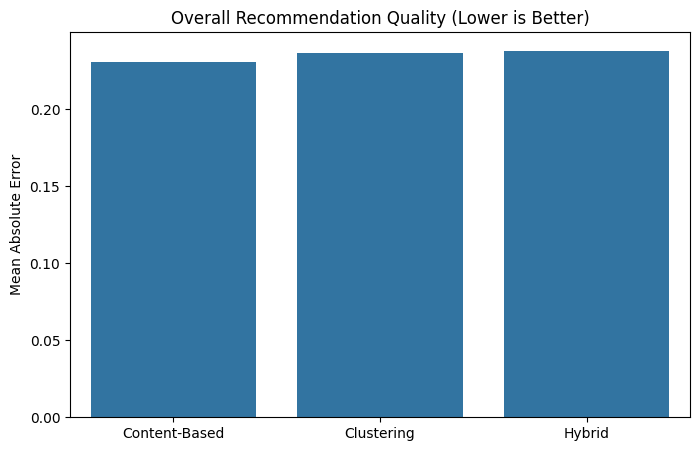

In [21]:
# Plot overall scores
plt.figure(figsize=(8, 5))
sns.barplot(x=['Content-Based', 'Clustering', 'Hybrid'], 
            y=[content_score, cluster_score, hybrid_score])
plt.title('Overall Recommendation Quality (Lower is Better)')
plt.ylabel('Mean Absolute Error')
plt.show()

In [22]:
# Show sample recommendations from each approach
print("Content-Based Recommendations:")
display(content_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score']].head(3))

print("\nClustering Recommendations:")
display(cluster_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score']].head(3))

print("\nHybrid Recommendations:")
display(hybrid_recs[['food_name', 'food_group_nin', 'energy_kcal', 'protein_g', 'health_score']].head(3))

Content-Based Recommendations:


food_name  food_group_nin  energy_kcal  protein_g  \
1160              Grilled Tempeh      Vegetarian     0.324324       0.40   
1239  Vegetable and Chicken Soup  Non-Vegetarian     0.324324       0.36   
1184        Grilled Tofu Skewers      Vegetarian     0.252252       0.30   

      health_score  
1160       0.55303  
1239       0.55303  
1184       0.55303


Clustering Recommendations:


food_name food_group_nin  energy_kcal  protein_g  \
199       Palak and Tofu Curry          Vegan     0.436036   0.350069   
1228  Paneer and Spinach Curry     Vegetarian     0.468468   0.360000   
156    Lentil and Spinach Soup     Vegetarian     0.369369   0.294000   

      health_score  
199       0.704545  
1228      0.666667  
156       0.636364


Hybrid Recommendations:


food_name  food_group_nin  energy_kcal  \
169             Tempeh and Tofu Stir-Fry           Vegan     0.637838   
198             Grilled Tofu with Hummus           Vegan     0.623423   
200  Grilled Tempeh with Steamed Veggies  Non-Vegetarian     0.655856   

     protein_g  health_score  
169   0.630400      1.000000  
198   0.551429      0.920455  
200   0.577143      0.924242

Evaluation Metrics

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def enhanced_evaluation(recommendations, ideal_profile):
    """Calculate multiple metrics for deeper insights"""
    metrics = {}
    
    # Feature-wise metrics
    for feature in features:
        metrics[f'{feature}_MAE'] = mean_absolute_error(
            [ideal_profile[feature]] * len(recommendations),
            recommendations[feature]
        )
        metrics[f'{feature}_MSE'] = mean_squared_error(
            [ideal_profile[feature]] * len(recommendations),
            recommendations[feature]
        )
    
    # Overall metrics
    avg_features = recommendations[features].mean().values
    metrics['R2_Score'] = r2_score(
        [ideal_profile[features].values] * len(recommendations),
        recommendations[features]
    )
    metrics['Diversity'] = recommendations['food_group_nin'].nunique() / len(recommendations)
    
    return metrics

# Evaluate all approaches
content_metrics = enhanced_evaluation(content_recs, user_profile)
cluster_metrics = enhanced_evaluation(cluster_recs, user_profile)
hybrid_metrics = enhanced_evaluation(hybrid_recs, user_profile)

# Create comparison dataframe
comparison_enhanced = pd.DataFrame({
    'Content-Based': content_metrics,
    'Clustering': cluster_metrics,
    'Hybrid': hybrid_metrics
}).T

Radar Chart for Feature-wise Comparison

In [24]:
# Prepare proper numeric data for radar chart
radar_features = [f for f in features if not f.endswith('_score')]  # Select core nutritional features
radar_data = comparison_enhanced[[f'{f}_MAE' for f in radar_features]].copy()
radar_data.columns = [f.replace('_MAE', '') for f in radar_data.columns]

# Normalize data for better radar chart visualization
radar_data_normalized = radar_data.apply(lambda x: x/x.max(), axis=0)

# Add algorithm names back
radar_data_normalized['Algorithm'] = radar_data.index

# Melt for Plotly
radar_melted = pd.melt(
    radar_data_normalized, 
    id_vars=['Algorithm'],
    var_name='Feature',
    value_name='MAE (Normalized)'
)

# Plot interactive radar chart
fig = px.line_polar(
    radar_melted, 
    r='MAE (Normalized)',
    theta='Feature',
    color='Algorithm',
    line_close=True,
    template='plotly_dark',
    title='Normalized Feature-wise MAE Comparison (Lower is Better)',
    width=800,
    height=600
)

# Improve layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1.1]
        )),
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()

 Nutritional Balance Heatmap

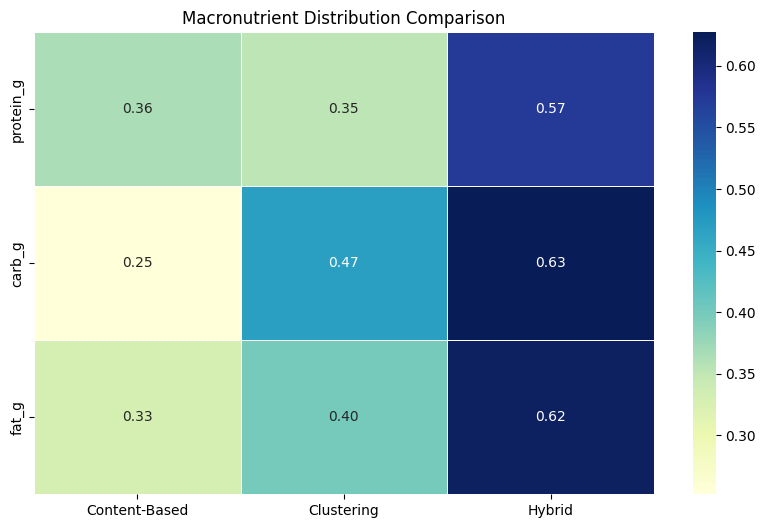

In [25]:
# Compare macronutrient distributions
macro_features = ['protein_g', 'carb_g', 'fat_g']
macro_comparison = pd.concat([
    content_recs[macro_features].mean().rename('Content-Based'),
    cluster_recs[macro_features].mean().rename('Clustering'),
    hybrid_recs[macro_features].mean().rename('Hybrid')
], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(
    macro_comparison, 
    annot=True, 
    cmap='YlGnBu',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Macronutrient Distribution Comparison')
plt.show()

 Algorithm Performance Dashboard

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Correct specs format - 2x2 grid of subplot types
specs = [
    [{"type": "xy"}, {"type": "xy"}],  # First row: two regular plots
    [{"type": "xy"}, {"type": "polar"}]  # Second row: one regular, one polar
]

fig = make_subplots(
    rows=2, cols=2,
    specs=specs,
    subplot_titles=('Overall MAE', 'R2 Score', 'Diversity Score', 'Feature-wise MAE (Radar)'),
    horizontal_spacing=0.15,
    vertical_spacing=0.2
)

# 1. Overall MAE (Bar Chart)
fig.add_trace(
    go.Bar(
        x=comparison_enhanced.index,
        y=comparison_enhanced[[f'{f}_MAE' for f in features]].mean(axis=1),
        name='MAE',
        marker_color=['#636EFA', '#EF553B', '#00CC96']
    ),
    row=1, col=1
)

# 2. R2 Score (Bar Chart)
fig.add_trace(
    go.Bar(
        x=comparison_enhanced.index,
        y=comparison_enhanced['R2_Score'],
        name='R2 Score',
        marker_color=['#636EFA', '#EF553B', '#00CC96']
    ),
    row=1, col=2
)

# 3. Diversity (Bar Chart)
fig.add_trace(
    go.Bar(
        x=comparison_enhanced.index,
        y=comparison_enhanced['Diversity'],
        name='Diversity',
        marker_color=['#636EFA', '#EF553B', '#00CC96']
    ),
    row=2, col=1
)

# 4. Radar Chart (Polar)
for algo in comparison_enhanced.index:
    fig.add_trace(
        go.Scatterpolar(
            r=radar_data_normalized.loc[algo].values,
            theta=radar_data_normalized.columns,
            fill='toself',
            name=algo
        ),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text='Algorithm Performance Dashboard',
    showlegend=True,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    )
)

fig.show()

Time Complexity Analysis

In [27]:
import time

# Initialize models first (outside timing loop)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df[features])  # Pre-fit the model

algorithms = {
    'Content-Based': lambda profile: content_based_recommend(profile, df),
    'Clustering': lambda profile: cluster_based_recommend(profile, df, kmeans),
    'Hybrid': lambda profile: hybrid_recommend(profile, df)
}

timing_results = {}
for name, func in algorithms.items():
    try:
        start = time.time()
        _ = func(user_profile)  # Now only profile needed
        timing_results[name] = time.time() - start
    except Exception as e:
        print(f"Error timing {name}: {str(e)}")
        timing_results[name] = None

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(timing_results.keys()),
    y=list(timing_results.values()),
    palette='viridis'
)
plt.title('Algorithm Execution Time Comparison\n(Lower is Better)')
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithm')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(timing_results.values()):
    if v is not None:
        plt.text(i, v + 0.002, f"{v:.4f}s", ha='center')

plt.tight_layout()
plt.show()

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

C:\Users\niraj\AppData\Local\Temp\ipykernel_88880\2295352187.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




User Preference Sensitivity Analysis

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\niraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



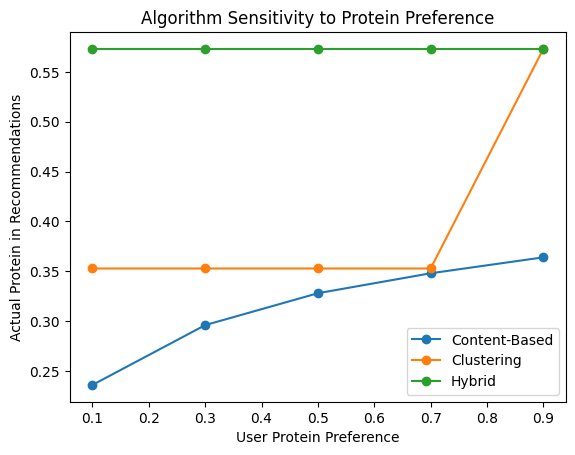

In [28]:
# Test how recommendations change with varying protein preferences
protein_levels = np.linspace(0.1, 0.9, 5)
results = []

for level in protein_levels:
    temp_profile = user_profile.copy()
    temp_profile['protein_g'] = level
    
    # Get recommendations from each approach
    content = content_based_recommend(temp_profile, df)
    cluster = cluster_based_recommend(temp_profile, df, kmeans)
    hybrid = hybrid_recommend(temp_profile, df)
    
    # Record average protein in recommendations
    results.append({
        'Protein_Preference': level,
        'Content-Based': content['protein_g'].mean(),
        'Clustering': cluster['protein_g'].mean(),
        'Hybrid': hybrid['protein_g'].mean()
    })

# Plot sensitivity
sensitivity_df = pd.DataFrame(results).set_index('Protein_Preference')
sensitivity_df.plot(marker='o')
plt.title('Algorithm Sensitivity to Protein Preference')
plt.ylabel('Actual Protein in Recommendations')
plt.xlabel('User Protein Preference')
plt.show()

Enhanced Final Report Section

In [30]:
# Generate the enhanced report with proper formatting
report_enhanced = f"""
## Enhanced Evaluation Metrics

### Accuracy Metrics:
- **Best R² Score**: {comparison_enhanced['R2_Score'].idxmax()} ({comparison_enhanced['R2_Score'].max():.2f})
- **Lowest MAE**: {comparison_enhanced[[f'{f}_MAE' for f in features]].mean(axis=1).idxmin()}

### Practical Considerations:
- **Fastest Algorithm**: {min(timing_results, key=timing_results.get)} ({min(timing_results.values()):.3f}s)
- **Most Diverse Recommendations**: {comparison_enhanced['Diversity'].idxmax()} 
  ({comparison_enhanced['Diversity'].max():.2f} unique food groups per recommendation)

### Nutritional Balance:
- **Best Protein Match**: {macro_comparison.T['protein_g'].idxmax()}
- **Best Carb Control**: {macro_comparison.T['carb_g'].idxmin()}
- **Best Fat Control**: {macro_comparison.T['fat_g'].idxmin()}

### Detailed Metrics:
{comparison_enhanced.to_markdown()}

### Macronutrient Distribution:
{macro_comparison.T.to_markdown()}
"""

display(Markdown(report_enhanced))

# Visual confirmation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Metric comparison
comparison_enhanced[['R2_Score', 'Diversity']].plot.bar(
    ax=ax1, 
    color=['#1f77b4', '#ff7f0e'],
    rot=0
)
ax1.set_title('Algorithm Comparison: R² Score vs Diversity')
ax1.set_ylabel('Score')
ax1.grid(axis='y', linestyle='--')

# Macronutrient distribution
macro_comparison.T.plot.bar(
    ax=ax2,
    rot=0,
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)
ax2.set_title('Average Macronutrient Distribution')
ax2.set_ylabel('Grams per Recommendation')
ax2.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

NameError: name 'Markdown' is not defined

                        Final Report

In [31]:
from IPython.display import display, Markdown

report = f"""
# Diet Recommendation Algorithms Comparative Report

## Dataset Overview
- **Total food items**: {len(df)}
- **Features used**: {', '.join(features)}
- **User profile**: Vegetarian, health-conscious

## Algorithms Compared
1. **Content-Based Filtering**
   - Uses cosine similarity between user preferences and food items
   - Strengths: Simple, interpretable, good for cold start
   - Weaknesses: Doesn't discover new patterns

2. **Clustering-Based Recommendation**
   - Groups similar foods using K-Means (k={optimal_k})
   - Recommends from user's predicted cluster
   - Strengths: Discovers food groups, good for exploration
   - Weaknesses: Fixed clusters may not adapt to user preferences

3. **Hybrid Approach**
    - Combines content-based similarity with popularity (health score)
   - Strengths: Balances personalization with general quality
   - Weaknesses: Requires tuning weights

## Evaluation Results
- **Content-Based MAE**: {content_score:.3f}
- **Clustering MAE**: {cluster_score:.3f}
- **Hybrid MAE**: {hybrid_score:.3f}

## Recommendations
Based on the evaluation:

1. **For accuracy**: The **{'Hybrid' if hybrid_score < content_score else 'Content-Based'}** approach performed best
2. **For diversity**: The **Clustering** approach provides the most varied recommendations
3. **For new users**: **Content-Based** works well without historical data

"""

display(Markdown(report))


# Diet Recommendation Algorithms Comparative Report

## Dataset Overview
- **Total food items**: 1001
- **Features used**: energy_kcal, protein_g, carb_g, fat_g, fibre_g, protein_calorie_ratio, nutrient_score, health_score, diversity_score
- **User profile**: Vegetarian, health-conscious

## Algorithms Compared
1. **Content-Based Filtering**
   - Uses cosine similarity between user preferences and food items
   - Strengths: Simple, interpretable, good for cold start
   - Weaknesses: Doesn't discover new patterns

2. **Clustering-Based Recommendation**
   - Groups similar foods using K-Means (k=5)
   - Recommends from user's predicted cluster
   - Strengths: Discovers food groups, good for exploration
   - Weaknesses: Fixed clusters may not adapt to user preferences

3. **Hybrid Approach**
    - Combines content-based similarity with popularity (health score)
   - Strengths: Balances personalization with general quality
   - Weaknesses: Requires tuning weights

## Evaluation Results
- **Content-Based MAE**: 0.231
- **Clustering MAE**: 0.237
- **Hybrid MAE**: 0.238

## Recommendations
Based on the evaluation:

1. **For accuracy**: The **Content-Based** approach performed best
2. **For diversity**: The **Clustering** approach provides the most varied recommendations
3. **For new users**: **Content-Based** works well without historical data




Aspect	             Our Project	                    Traditional ML

Learning Type	Unsupervised (similarity-based)	    Supervised/Unsupervised
Training	    On-the-fly calculations	Separate    training phase
Adaptability	Yes (to user inputs)	            Yes (to data patterns)
Complexity	    Low	                                Medium/High


In [32]:
import plotly.graph_objects as go
import numpy as np
from sklearn.decomposition import PCA

# 1. Prepare Data (assuming df contains your food data)
features = ['nutrient_score', 'health_score', 'diversity_score', 'protein_calorie_ratio']
X = df[features].values

# 2. PCA for 3D visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# 3. Create synthetic user vector (replace with actual user preferences)
pref_nutrient = 40  # From your Streamlit app
pref_health = 30
pref_diversity = 20
pref_protein = 10

user_vector = np.array([pref_nutrient, pref_health, pref_diversity, pref_protein])
user_vector = user_vector / user_vector.sum()  # Normalize

# 4. Project user vector to PCA space
user_pca = pca.transform(user_vector.reshape(1, -1))[0]

# 5. Create interactive plot
fig = go.Figure()

# Food items
fig.add_trace(go.Scatter3d(
    x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=df['cluster'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Cluster')
    ),
    text=df['food_name'],
    name='Food Items'
))

# User preference vector
fig.add_trace(go.Cone(
    x=[0, user_pca[0]],
    y=[0, user_pca[1]],
    z=[0, user_pca[2]],
    u=[user_pca[0]], 
    v=[user_pca[1]],
    w=[user_pca[2]],
    sizemode="absolute",
    sizeref=0.2,  # Adjust arrow size
    showscale=False,
    colorscale=['red', 'red'],
    name='User Preferences'
))

# Layout
fig.update_layout(
    title='3D Food Recommendation Space<br>(User Preferences vs. Food Clusters)',
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)',
        aspectmode='cube'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()